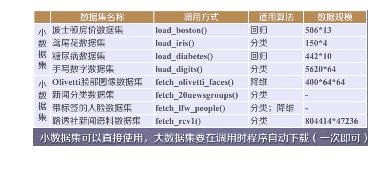

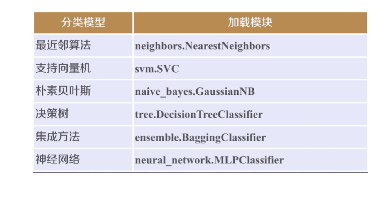

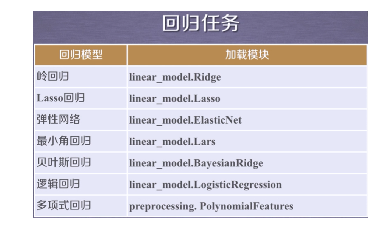

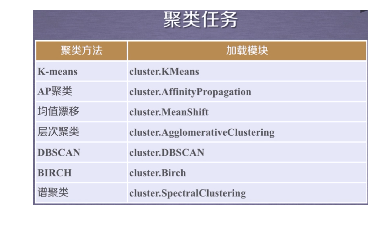

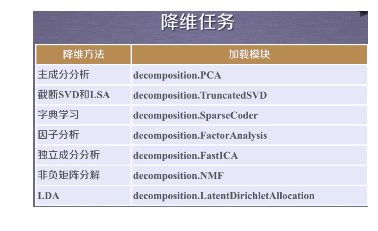

In [11]:
#吴恩达 Machine Learning 
#http://t.cn/RJZQbV2
#Standford手书版
#http://t.cn/RwUWKMS
#http://cs229.stanford.edu/

#<<CS231n>> 
#http://cs231n.stanford.eud/,深度学习
#http://t.cn/RqRNasR

#<<reinforcement learning>> 增强学习
#http://t.cn/Rw0rwtU
#http://t.cn/RIAfRUt

#http://www.lfd.uci.edu/~gohlke/pythonlibs/#

#pip install '.whl'

import matplotlib.pyplot as plt
import matplotlib.image as img
imdata=img.imread('C:\\Users\\hzg0601\\Pictures\\data.png')
plt.imshow(imdata)
plt.axis('off')
plt.show()

im2=img.imread('C:\\Users\\hzg0601\\Pictures\\classification.png')
plt.imshow(im2)
plt.axis('off')
plt.show()

im3=img.imread('C:\\Users\\hzg0601\\Pictures\\regression.png')
plt.imshow(im3)
plt.axis('off')
plt.show()

im3=img.imread('C:\\Users\\hzg0601\\Pictures\\cluster.png')
plt.imshow(im3)
plt.axis('off')
plt.show()

im4=img.imread('C:\\Users\\hzg0601\\Pictures\\dim_reduction.png')
plt.imshow(im4)
plt.axis('off')
plt.show()

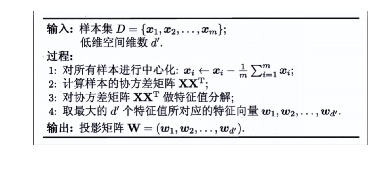

In [5]:

#PCA
    #矩阵的主成分就是其协方差矩阵对应的特征向量,按照对应的特征值大小进行排序,最大特征值就是第一主成分,其次是第二主成分,以此类推.
import matplotlib.pyplot as plt
import matplotlib.image as img
img1=img.imread('C:\\Users\\hzg0601\\Pictures\\pca1.png')
plt.imshow(img1)
plt.axis('off')
plt.show()

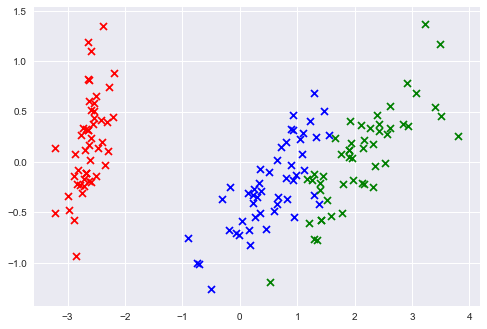

In [2]:
from sklearn.decomposition import PCA 
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('seaborn')

data=load_iris()
y=data.target
X=data.data

pca=PCA(n_components=2)
reduced_X=pca.fit_transform(X)#

#print(reduced_X)
#定义各类数据点?
red_x,red_y=[],[]
blue_x,blue_y=[],[]
green_x,green_y=[],[]
#按照鸢尾花的类别将降维后的数据点保存在不同的列表中
for i in range(len(reduced_X)):
    if y[i]==0:
        red_x.append(reduced_X[i][0])
        red_y.append(reduced_X[i][1])
    elif y[i]==1:
        blue_x.append(reduced_X[i][0])
        blue_y.append(reduced_X[i][1])
    else:
        green_x.append(reduced_X[i][0])
        green_y.append(reduced_X[i][1])

plt.scatter(red_x,red_y,c='r',marker='x')
plt.scatter(blue_x,blue_y,c='b',marker='x')
plt.scatter(green_x,green_y,c='g',marker='x')

plt.show()

In [16]:
PCA?

In [19]:
#method
    #fit(X[,y]) fit the model with X
    #fit_transform(X[,y]) fit the model with X and apply the dimensionality reudction on X
    #get_covariance()
    #get_params([deep]), get paremeters for this estimator
    #get_precision(),compute data precision matrix with the generative model
    #inverse_transform(X),transform data back to its original space
    #socre(X[,y]), return the average log-likelihood of all samples
    #score_sample(X), return the log-likelihood of each sample
    #set_params(**params) set the parameters of this estimator
    #transfom(X), apply dimensionality reduction to X
    

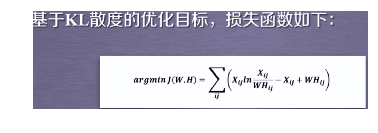

In [2]:
#非负矩阵分解(NMF)
    #非负矩阵(Non-negative matrix factorization)是在矩阵中所有元素均为非负数约束条件下的矩阵分解方法
    #基本思想:给定一个非负矩阵V,NMF能够找到一个非负矩阵W和一个非负矩阵H,使得矩阵W和H的乘积近似等于V.
    #$V_{n*m}=W_{n*k}*H_{k*M}$,其中W矩阵为基础图像矩阵,相当于从原矩阵V中抽取出来的特征,而H矩阵为系数矩阵，用在图像，文本，语音
    #矩阵分解优化目标：最小化W＊H与V之间的差别，可基于１）欧式距离；２）KL散度,损失函数如下:
import matplotlib.pyplot as plt
import matplotlib.image as img

nmf=img.imread('C:\\Users\\hzg0601\\Pictures\\nmf.png')
plt.imshow(nmf)
plt.axis('off')
plt.show()

    
    

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\hzg0601\scikit_learn_data


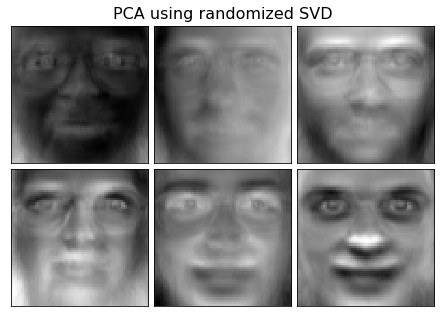

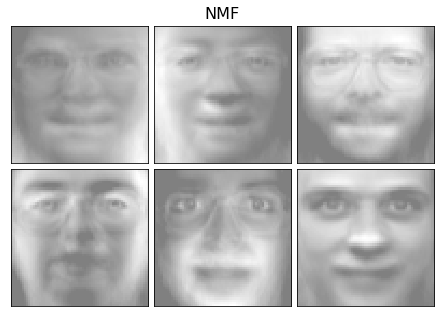

In [5]:
#NMF算法的参数,n_components,成分数;init,W和H的初始化方法

#k为提取特征数目

from sklearn.decomposition import PCA,NMF
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces as faces
from numpy.random import RandomState#用于创建随机种子

n_row,n_col=2,3#设置图像展示时的排列状况
n_components=n_row*n_col#设置提取特征的数目
image_shape=(64,64)#设置人脸数据图片的大小

dataset=faces(shuffle=True,random_state=RandomState(0))#加载数据,并打乱顺序
face=dataset.data

def plot_gallery(title,images,n_col=n_col,n_row=n_row):
    plt.figure(figsize=(2.*n_col,2.26*n_row))#创建图片,并指定图片大小
    plt.suptitle(title,size=16)#设置标题及字号
    
    for i ,comp in enumerate(images):
        plt.subplot(n_row,n_col,i+1)#选择画制的子图
        vmax=max(comp.max(),-comp.min())
        plt.imshow(comp.reshape(image_shape),cmap=plt.cm.gray,
                  interpolation='nearest',vmin=-vmax,vmax=vmax)#对数据进行归一化,并以灰度图形显示
        plt.xticks(())
        plt.yticks(())#去除子图的坐标轴标签
    plt.subplots_adjust(0.01,0.05,0.99,0.93,0.04,0.)#对子图位置及间隔进行调整
    
estimators=[('PCA using randomized SVD',PCA(n_components=6,whiten=True)),
          ('NMF',NMF(n_components=6,init='nndsvda',tol=5e-3))]#创建PCA和NMF实例
for name,estimator in estimators:
    estimator.fit(face)
    components_=estimator.components_#获取提取特征
    plot_gallery(name,components_[:n_components])#按照固定格式进行排列
plt.show()
    


In [3]:
#图像分割
    #利用图像的灰度,颜色,纹理,形状等特征,把图像分割成若干个不重叠的区域,并使这些特征在同一区域内呈现相似性,在不同的区域之间存在明显的差异性
    #然后就可以就可以将分割的图像中具有独特性质的区域提取出来用于不同的研究.
 #常用方法   #
    #阈值分割:对图像灰度进行度量,设置不同类别的阈值,达到分割的目的
    #边缘分割:对图像边缘进行检测,即检测图像中灰度值发生跳变的地方,则为一片区域的边缘.
    #直方图法:对图像的颜色建立直方图,而直方图的波峰波谷能够表示一块区域的颜色值的范围,来达到分割的目的
    #特定理论:基于聚类分析\小波变换等理论.
    
#目标###
    #目标:利用K-means聚类算法对图像像素点颜色进行聚类实现简单的图像分割
    #输出:同一聚类中的点使用相同颜色标记,不同聚类颜色不同.
    



In [6]:
import PIL.Image as image
import numpy as np
from sklearn.cluster import KMeans



In [1]:
#通过设置不同的k值,能够得到不同的聚类结果.同时k值的不确定性也是Kmeans算法的一个缺点.往往为了达到好的实验结果,需要进行多次尝试才能够选取最优的
#k值,而像层次聚类的算法,就无需指定k值,只要给定限制条件,就能自动地得到类别数k.

In [12]:
import numpy as np
import PIL.Image as image
from sklearn.cluster import KMeans
 
def loadData(filePath):
    f = open(filePath,'rb')#以二进制文件读取
    data = []
    img = image.open(f)#打开图片
    m,n = img.size#获取图片的大小:宽,高,jpg图片是以像素点存储的
    for i in range(m):
        for j in range(n):
            x,y,z = img.getpixel((i,j))#获得给定位置的像素即RGB值,如果是多层图像,则以元组返回.
            #print(x,y,z)
            data.append([x/256.0,y/256.0,z/256.0])#归一化
    f.close()
    return np.mat(data),m,n #作为矩阵存储(m*n)*3
 
imgData,row,col = loadData('C:\\Users\\hzg0601\\Pictures\\cj.jpg')#只能识别jpg格式
#print(imgData)
label = KMeans(n_clusters=4).fit_predict(imgData)#获得每个像素点的聚类标签

label = label.reshape([row,col])#将聚类标签重新排列为row*col的数组,
#print(label)
pic_new = image.new("L", (row, col))#以8位像素创建image类,大小为:宽row,高col
for i in range(row):
    for j in range(col):
        pic_new.putpixel((i,j), int(256/(label[i][j]+1)))#将(i,j)点的像素值设为256/(label[i][j]+1)
pic_new.save("result-bull-4.jpg", "JPEG")

In [ ]:
#1 (1-bit pixels, black and white, stored with one pixel per byte)
#L (8-bit pixels, black and white)
#P (8-bit pixels, mapped to any other mode using a color palette)
#RGB (3x8-bit pixels, true color)
#RGBA (4x8-bit pixels, true color with transparency mask)
#CMYK (4x8-bit pixels, color separation)
#YCbCr (3x8-bit pixels, color video format)
#Note that this refers to the JPEG, and not the ITU-R BT.2020, standard
#LAB (3x8-bit pixels, the L*a*b color space)
#HSV (3x8-bit pixels, Hue, Saturation, Value color space)
#I (32-bit signed integer pixels)
#F (32-bit floating point pixels)

In [16]:
np.mat?

In [52]:
import PIL.Image as image
codeLib = '''@B%8&WM#*oahkbdpqwmZO0QLCJUYXzcvunxrjft/\|()1{}[]?-_+~<>i!lI;:,"^`'. '''#生成字符画所需的字符字典
count = len(codeLib)

def loadData(filePath):
    f = open(filePath,'rb')#以二进制文件读取
    codepicture=''
    img = image.open(f)#打开图片
    
    m,n = img.size#获取图片的大小:宽,高,jpg图片是以像素点存储的
    print(m,n)
    img=img.resize((int(m*0.25),int(n*0.25)))
    k,f = img.size#获取图片的大小:宽,高,jpg图片是以像素点存储的
    print(k,f)
    #img=img.convert('L')
    for i in range(f):
        for j in range(k):
            r,g,b=img.getpixel((j,i))
            #gray=(r*0.299+g*0.587+b*0.114)
            index=int(((count-1)*(r*0.299+g*0.587+b*0.114))/256)
            #print(r,g,b)
            #print(index)
            codepicture=codepicture+codeLib[index]
        codepicture=codepicture+'\r\n'
    #print(codepicture)
    tmp=open('C:\\Users\\hzg0601\\Pictures\\tmp.txt','w')
    tmp.write(codepicture)
    tmp.close
    #return codepicture

loadData('C:\\Users\\hzg0601\\Pictures\\wd.jpg')

        

313 606
78 151


In [22]:
def loadData(filePath):
    f = open(filePath,'rb')#以二进制文件读取
    codepicture=''
    img = image.open(f)#打开图片
    
    m,n = img.size#获取图片的大小:宽,高,jpg图片是以像素点存储的
    img=img.resize((int(m*0.25),int(n*0.25)))
    k,f = img.size#获取图片的大小:宽,高,jpg图片是以像素点存储的
    print(k,f)
    print(m,n)
loadData('C:\\Users\\hzg0601\\Pictures\\wtt.jpg')    

300 150
600 600
